In [16]:
import pandas as pd
from pymongo import MongoClient
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn
import string
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
import datetime
import random

%matplotlib inline




The purpose of this notebook is to perform EDA on a small sample of my data.

In [17]:
#connect to mongo client [REMEBER TO START THE SERVER FIRST]
client = MongoClient('mongodb://localhost:27017/')
db = client['parsedA']
posts = db['post0-5000s']
posts.find().count()

2715

In [18]:
#turn the mongo db in to a pandas df
cursor = posts.find()
df =  pd.DataFrame(list(cursor))
del df['_id']
df.tail()

,chic_points,comments,date,favorites,followers,garment_links,id,location,main_photo,photo_desc,post_id,style_council,subphotos,tags,title,username,votes
2710,433,0,"[2008, 6, 15]",0,2,None,4991,"Philadelphia, PA",http://images2.chictopia.com/photos/becks/4490...,\nGray V-neck tshirt Forever21\nBlack cotton ...,4991,Style_council,[http://images2.chictopia.com/photos/becks/449...,"[Casual, Everyday, Summer]",Sunday,becks,1
2711,390,4,"[2008, 6, 15]",3,0,"[gray, kucoon designs, kucoon jacket]",4993,NaN,http://images0.chictopia.com/photos/chicapelig...,\nphotograph i took of my friends line KUCOON,4993,Style_council,No Subphotos,"[Casual, Casual Party, Summer, fashion]",dressed from head to toe in Kucoon Designs,chicapeligrosa,5
2712,1442,4,"[2008, 6, 15]",0,11,None,4996,"Lawrence, KS",http://images2.chictopia.com/photos/SaraSara/7...,\ni wore this outfit to my parents house for a...,4996,Style_council,No Subphotos,"[70s, Wine Tasting, Summer]",granny pants,SaraSara,6
2713,380,0,"[2008, 6, 15]",0,0,"[black, American Apparel dress]",4998,NaN,http://images2.chictopia.com/photos/tortuga98/...,\nAmerican Apparel dress\nMia platform wedge e...,4998,Style_council,No Subphotos,"[Casual, Everyday, Summer]",Martini on a hot spring day,tortuga98,0
2714,502,2,"[2008, 6, 15]",9,2,None,4999,NaN,http://images2.chictopia.com/photos/girlhive/9...,\nFrom Lucky magazine.,4999,Style_council,No Subphotos,"[Chic, Cocktail, Summer]",Slouchy Silhouette,girlhive,3


In [20]:
df.describe()

,chic_points,comments,favorites,followers,id,post_id,votes
count,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000
mean,5581.498711,3.985267,2.862983,3245.596685,2458.209576,2368.100552,13.714917
std,19054.581654,8.471884,10.422947,21636.283810,1472.611609,1535.051412,29.095106
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,416.000000,0.000000,0.000000,0.000000,1141.500000,934.500000,0.000000
50%,637.000000,2.000000,0.000000,7.000000,2447.000000,2339.000000,3.000000
75%,1405.000000,5.000000,2.000000,47.000000,3744.500000,3721.500000,18.000000
max,162023.000000,244.000000,267.000000,160155.000000,4999.000000,4999.000000,439.000000


In [21]:
df['desc_length'] = [len(desc) for desc in df['photo_desc'].values]


In [22]:
df['desc_length']

0        785
1         68
2        135
3        111
4        104
5        110
6         94
7         68
8        119
9         94
10       115
11       179
12        62
13       128
14       164
15       101
16        49
17        76
18        55
19       122
20        94
21       121
22       310
23        14
24        14
25        14
26        14
27        14
28        14
29        41
        ... 
2685      81
2686     519
2687      27
2688     346
2689      72
2690     238
2691      87
2692     405
2693     192
2694      55
2695     121
2696     172
2697     111
2698      38
2699     166
2700     205
2701      91
2702      93
2703     510
2704     228
2705     191
2706    1614
2707     289
2708     732
2709      39
2710     124
2711      45
2712     388
2713      79
2714      22
Name: desc_length, dtype: int64

In [23]:
df['num_subphotos'] = [0 if entry=='No Subphotos' else len(entry) for entry in df['subphotos']]

In [24]:
df.describe()

,chic_points,comments,favorites,followers,id,post_id,votes,desc_length,num_subphotos
count,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000,2715.000000
mean,5581.498711,3.985267,2.862983,3245.596685,2458.209576,2368.100552,13.714917,186.636096,0.430571
std,19054.581654,8.471884,10.422947,21636.283810,1472.611609,1535.051412,29.095106,225.232727,0.981716
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,416.000000,0.000000,0.000000,0.000000,1141.500000,934.500000,0.000000,45.000000,0.000000
50%,637.000000,2.000000,0.000000,7.000000,2447.000000,2339.000000,3.000000,114.000000,0.000000
75%,1405.000000,5.000000,2.000000,47.000000,3744.500000,3721.500000,18.000000,235.000000,0.000000
max,162023.000000,244.000000,267.000000,160155.000000,4999.000000,4999.000000,439.000000,2356.000000,5.000000


In [25]:
lin = LinearRegression()

In [28]:
test = df.sample(frac=0.15)
train_and_cross_val = df.loc[~df.index.isin(test.index)]


In [29]:
cross_val = train_and_cross_val.sample(frac=0.2)
train = train_and_cross_val.loc[~train_and_cross_val.index.isin(cross_val.index)]

In [30]:
len(train)

1846

In [31]:
model = lin.fit(train[['desc_length', 'num_subphotos']], train['favorites'])

/Users/claremariemyers/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [32]:
model.coef_


array([ 0.00626071,  0.69830176])

In [33]:
model.intercept_

1.2992266318333763

In [34]:
y_preds = model.predict(cross_val[['desc_length', 'num_subphotos']])
y_preds

array([ 1.31174804,  1.45574426,  1.46200497,  5.56949388,  1.44322285,
        4.71131101,  2.3259823 ,  5.9860639 ,  1.81886517,  5.19385156,
        3.27181504,  2.13190044,  6.15510294,  1.98164351,  1.92529716,
        5.45390395,  1.48078709,  5.38503619,  3.14660093,  2.21955031,
        4.27978859,  1.59347978,  7.85465131,  1.64356542,  2.2070289 ,
        1.70617248,  2.87066366,  1.78756164,  1.38687651,  1.38687651,
        4.28315206,  1.40565862,  1.44948356,  2.18198608,  2.01294703,
        1.98164351,  4.78690572,  2.06303268,  1.66234754,  1.77504023,
        1.70617248,  1.50582991,  1.38687651,  4.73009313,  4.48013116,
        2.83936013,  2.78927449,  2.06303268,  2.89570648,  5.65424652,
        3.4596362 ,  1.83764729,  2.6828425 ,  2.16946467,  5.38839967,
        1.31174804,  1.38687651,  1.66234754,  3.69464577,  1.92529716,
        3.77846593,  2.06929338,  1.56843696,  1.51835132,  1.38687651,
        2.23833243,  1.33679086,  1.39939792,  3.10857046,  1.38

In [37]:
cross_val['favorites']


1496     0
2451     0
368      0
2369     6
1522     1
1457     0
316      0
1790     8
1951     0
1813    19
860      0
74       0
2205     2
791      2
1920     0
1683     8
462      0
1330     2
2503     0
334      0
1247     4
60       2
798      0
1901     4
2180     6
1055     0
1072     0
1572     0
2375    56
49       0
        ..
2545     0
241      1
2614     2
1110     1
4        0
2169     1
2446     0
255      2
2309     1
789      0
1692     1
802      0
2134     0
2088     0
1585    13
629      0
943      0
1300     1
2296     0
2156    12
694      0
2224     1
475      0
616      0
1380     0
2339     1
2127     1
2204    12
2129     4
341      2
Name: favorites, dtype: int64

In [38]:
model.score(cross_val[['desc_length', 'num_subphotos']], cross_val['favorites'])


0.025994067777819985

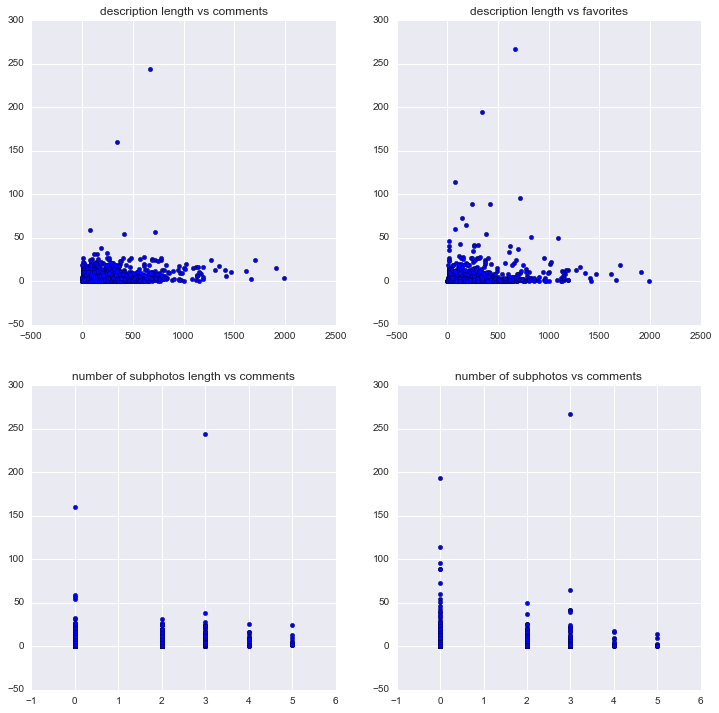

In [39]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
ax1.scatter(train['desc_length'], train['comments'])
ax1.set_title('description length vs comments')
ax2.scatter(train['desc_length'], train['favorites'])
ax2.set_title('description length vs favorites')
ax3.scatter(train['num_subphotos'], train['comments'])
ax3.set_title('number of subphotos length vs comments')
ax4.scatter(train['num_subphotos'], train['favorites'])
ax4.set_title('number of subphotos vs comments')


In [40]:
more_than_10_comments = train[train['comments'] > 10]['comments']
more_than_10_comments

134     16
182     13
183     13
203     22
207     17
227     15
228     20
236     13
273     12
290     31
304     14
308     12
312     11
324     11
343     14
350     22
367     21
521     23
579     20
586     17
608     13
609     15
646     18
656     24
721     13
725     24
732     19
744     12
775     12
810     24
        ..
2393    14
2409    12
2412    15
2453    11
2463    14
2476    13
2496    17
2508    11
2515    24
2519    18
2551    22
2572    21
2574    11
2595    24
2598    17
2607    13
2613    19
2620    18
2622    23
2630    20
2631    11
2641    19
2651    18
2660    15
2667    23
2685    11
2688    12
2694    11
2696    21
2706    12
Name: comments, dtype: int64

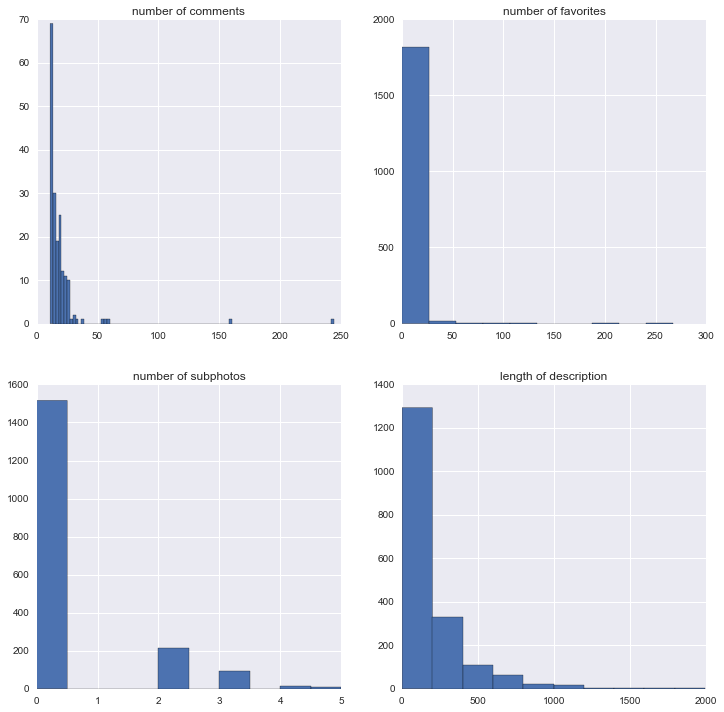

In [41]:


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
ax1.hist(more_than_10_comments, bins=100)
ax1.set_title('number of comments')
ax2.hist(train['favorites'])
ax2.set_title('number of favorites')
ax3.hist(train['num_subphotos'])
ax3.set_title('number of subphotos')
ax4.hist(train['desc_length'])
ax4.set_title('length of description')

               

In [43]:
descriptions = df['photo_desc']
descriptions

0       \nWelcome to Chictopia! A community where peop...
1       \nA winter look out on the town.  I thought th...
2       \nI dont know if shes a student, but I thought...
3       \nThis is a bundle of cozy scarf, jacket and u...
4       \nI thought this was a comfortable but stylish...
5       \nTaken at a friends wedding in AZ, the crew i...
6       \nJust shot this woman out on the town in SOMA...
7       \nI liked her leather jack here.  Alot of brow...
8       \nThese ladies were shopping and obviously hav...
9       \nThis woman just looked very much like she wa...
10      \nIts a little hard to see behind the coat and...
11      \nAlthough one may say that this hat could be ...
12      \nLooking all business, but her coat collar ma...
13      \nThe texture of the leather jacket works grea...
14      \nMilitary styled jackets seem to be extremely...
15      \nHeres what I dont getshes dress all hottie, ...
16      \nHmmpink jacket and green conversewhatcha thi...
17      \nDoes

In [67]:
def clean_descriptions(text_list):
    prepped_for_w2v = []
    for item in text_list:
        item = str(item)
        item = item.translate(None, string.punctuation).lower().replace('\n', ' ').split()
        prepped_for_w2v.append(item)
    return prepped_for_w2v


In [90]:
sentences = clean_descriptions(descriptions)
print type(sentences[5])

<type 'list'>


In [69]:
model = Word2Vec(sentences)

In [70]:
model.vocab

{'hats': <gensim.models.word2vec.Vocab at 0x11d6a8850>,
 'yellow': <gensim.models.word2vec.Vocab at 0x11e8f3d90>,
 'four': <gensim.models.word2vec.Vocab at 0x11e8f3d10>,
 'asian': <gensim.models.word2vec.Vocab at 0x11fcd9050>,
 'hanging': <gensim.models.word2vec.Vocab at 0x11e8f3e50>,
 'hate': <gensim.models.word2vec.Vocab at 0x11d6a8890>,
 'rocking': <gensim.models.word2vec.Vocab at 0x11d6c4950>,
 'lace': <gensim.models.word2vec.Vocab at 0x11d6be550>,
 'paris': <gensim.models.word2vec.Vocab at 0x11d6a88d0>,
 'bike': <gensim.models.word2vec.Vocab at 0x1201462d0>,
 'swap': <gensim.models.word2vec.Vocab at 0x11fcd9090>,
 'booties': <gensim.models.word2vec.Vocab at 0x120146310>,
 'trousers': <gensim.models.word2vec.Vocab at 0x11fcd90d0>,
 'bangles': <gensim.models.word2vec.Vocab at 0x11d6a8950>,
 'sorry': <gensim.models.word2vec.Vocab at 0x11fcd9110>,
 'worth': <gensim.models.word2vec.Vocab at 0x120146350>,
 'leggings': <gensim.models.word2vec.Vocab at 0x11fcd9850>,
 'rogan': <gensim.mode

In [80]:
print "Snakeskin: "
print model.most_similar("snakeskin")
print "Gladiator: "
print model.most_similar("gladiator")
print "Jeans: "
print model.most_similar("jeans")



Snakeskin: 
[('heels', 0.9978532195091248), ('levis', 0.9977594017982483), ('chanel', 0.9977508783340454), ('orange', 0.997744619846344), ('red', 0.9977427124977112), ('wet', 0.997734785079956), ('blue', 0.9977278709411621), ('20', 0.997724175453186), ('pumps', 0.9977074861526489), ('hat', 0.9976896047592163)]
Gladiator: 
[('red', 0.9996412992477417), ('hat', 0.9996355175971985), ('green', 0.9996275901794434), ('heels', 0.9996241331100464), ('pink', 0.9996227025985718), ('5', 0.9996058940887451), ('high', 0.9995978474617004), ('denim', 0.9995887279510498), ('blouse', 0.9995877742767334), ('light', 0.9995860457420349)]
Jeans: 
[('target', 0.9998762607574463), ('zara', 0.9998305439949036), ('tights', 0.9997576475143433), ('top', 0.9997530579566956), ('tank', 0.9996597766876221), ('bag', 0.9996566772460938), ('shoes', 0.9996495842933655), ('topshop', 0.9996370673179626), ('f21', 0.9996293783187866), ('shorts', 0.999627947807312)]


In [81]:
count_vectorizer = CountVectorizer()

In [82]:
vectors = count_vectorizer.fit_transform(descriptions)

In [83]:
vectors

<2715x9079 sparse matrix of type '<type 'numpy.int64'>'
	with 71795 stored elements in Compressed Sparse Row format>

In [84]:
count_vectorizer.vocabulary_['dress']

2519

In [107]:

        

#fucccccckkkk youuuuuuu

train.date
train.head()
train.date = pd.to_datetime(train.date, format='%Y%m%d', errors='ignore')
train.date
for date in train.date:
    print date

2008-03-02
2008-03-02
2008-03-02
2008-03-02
2008-03-02
2008-03-02
2008-03-02
2008-03-02
2008-03-02
2008-03-02
2008-03-02
2008-03-02
2008-03-02
2008-03-02
No Date
No Date
No Date
No Date
No Date
2008-03-02
No Date
2008-03-02
2008-03-02
2008-03-02
2008-03-02
No Date
2008-03-02
2008-03-02
No Date
No Date
No Date
No Date
No Date
No Date
2008-03-06
No Date
No Date
2008-03-08
2008-03-09
No Date
2008-03-10
2008-03-10
2008-03-10
2008-03-10
2008-03-12
No Date
2008-03-12
2008-03-13
2008-03-14
No Date
2008-03-14
2008-03-15
2008-03-15
No Date
2008-03-15
2008-03-15
No Date
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-16
2008-03-17
2008-03-18
2008-03-18
2008-03-18
2008-03-18
No Date
2008-03-18
No Date
2008-03-19
2008-03-19
No Date
2008-03-19
2008-03-19
No Date
2008-03-20
2008-03-20
2008-03-20
2008-03-20
2008-03-22
2008-03-22
2008-03-22
2008-03-23
2008-03-23
2008-03-24
2008-03-25
2008-03-25
2008-03-25
No Date
2008-03-26
2008-03-26
2008-03-27
2008-03-

In [164]:


plot = dress.plot_over_time(train, '2008-04-04', '2008-04-08')
rng = pd.date_range('2008-03-02', '2008-03-04')

plot

DatetimeIndex(['2008-04-04', '2008-04-05', '2008-04-06', '2008-04-07',
               '2008-04-08'],
              dtype='datetime64[ns]', freq='D')


(DatetimeIndex(['2008-04-04', '2008-04-05', '2008-04-06', '2008-04-07',
                '2008-04-08'],
               dtype='datetime64[ns]', freq='D'), [53, 55, 44, 31, 53])

In [30]:
gladiator.phrase

'gladiator'

In [33]:
#issue: need to make sure the phrase is actually being identified.
for desc in train.photo_desc:
    if "gladiator" in desc:
        print desc


Nicolas didnt have to look any further than the sweet 80s to find inspiration for his SS08 collection. Madly bright semi-abstract florals collide with structured, waist-centric silhouettes. Best worn with your scariest gladiator heels.
Vintage dress, Aldo heels, Forever21 sunglasses.
http://stores.ebay.com/Treasure-Chest-Vintage 

nine west marked down this shoe from $79 to $39 on their website and I jumped at the chance to get these shinyyyyy cut out sandals. Hmm.. tis the birthchild of the the Aldo cork heeled sandals and Ninewest gladiators  

ok. I understand gladiator shoes are back in style.. it took me while but now i really like the style.. i came across this shoe and i really like them! pls give me some fed back, do you like? do you think its a FAD? hELP! 

Whats worse than having mushroom soup all over you?
Having mushroom soup all over you when youre wearing gladiators!!!
A very bad day :(
The photo was taken before the accident. I had the the shirt tucked out after that. 


In [88]:
client.close()

In [89]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)